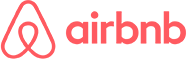

# Student Details
-----------------
#### Student 1: Ngima Doma Sherpa Student ID:2331197
#### Student 2: Rabi Dhaubanjar Student ID: 2329457  
#### Group: L6CG10
#### Module Leader:
#### Tutor : Mr Sandip Lamsal

---

# **Implementing Big Data Analytics for Airbnb Rental Price Optimization for Hosts and Travelers in New York through predictive modeling**

# **Overview of Dataset**
This  Airbnb datasets aim to provide insights and information about the listings and bookings on the Airbnb platform. These datasets contain various attributes related to the properties listed on Airbnb, such as location, property type, price, amenities, availability, host information, and more. Researchers, analysts, and data scientists use these datasets to study various aspects of the vacation rental market, customer preferences, pricing trends, and the impact of Airbnb on local economies.

# 1.Data Understanding, Cleaning and Transformation

Understand what is data about and why do you think the data was collected, and what research questions data can answers.

**Importing libraries**
----
Importing the libraries
We will import the libraries needed to create the ML model in this initial stage. The seaborn, matplotlib and the NumPy libraries are imported. For data analysis, we have also imported the Pandas library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

# PySpark Implementation for data reading

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.appName("LoadHdfsCsv").getOrCreate()
# Verify the Spark version
print(spark.version)

3.5.1


In [ ]:
path = "/content/drive/MyDrive/BigData/listings.csv"
df = spark.read.csv(path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------------------------+--------------------+--------------------+----------------------+--------------------+----------------------+----------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+---------------+--------------------+--------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------+---------

In [ ]:
df.printSchema() #similar to pandas dtype

root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- source: string (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable = true)
 |-- host_about: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_acceptance_rate: string (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_thumbnail_url: string (nullable = true)
 |-- host_picture_url: string (nullable = true)
 |-- host_neighbourhood: string (nullable = true)
 |-- host_listings_cou

In [ ]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_cols = len(df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 62653
Number of columns: 79


# 1.1 Data Understanding


The dataset includes a variety of columns, totaling 79 in number. Here are a few specific columns:

1. listing_id: Unique identifier for each Airbnb listing.

2. property_type: The type of property (e.g., apartment, house, villa).

3. host_name: Name of the host who listed the property.

4. price: Nightly rental price of the property.

5. availability: Number of available nights for booking.

6. review_scores_rating: Rating given by guests for the property.


In [ ]:
# Display the column names
column_names = df.columns

print(column_names)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/BigData/listings.csv")

## 1.2 Data Cleaning and Manipulation
---

Using ‘isnull function’ to discover where in our dataset there are missing values. This is useful information as this is what we need to correct while data cleaning.

In [ ]:
# Display the missing value sums for all columns
var = data.isnull().sum()
print(var.to_string())

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                2
description                                       993
neighborhood_overview                           17210
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                          38
host_since                                         38
host_location                                    7687
host_about                                      15979
host_response_time                              16148
host_response_rate                              16148
host_acceptance_rate                            14694
host_is_superhost           

In [ ]:
# After viewing the multiple columns in the dataset, the following variables were picked for further analysis and dropped variables like date_scraped,source,listing_url etc as logically thet dont affect the price.
selectedFeatures = data[['id','name','longitude','latitude','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','neighbourhood_group_cleansed','host_id','host_name','host_since',
                 'host_response_time','bathrooms_text','review_scores_rating','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds','reviews_per_month','amenities','number_of_reviews','price']]
selectedFeatures.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,neighbourhood_group_cleansed,host_id,...,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,36121,Lg Rm in Historic Prospect Heights,-73.966110,40.673760,Cozy space share in the heart of a great neigh...,f,Full of tree-lined streets and beautiful brown...,Prospect Heights,Brooklyn,62165,...,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,0.05,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",9,$200.00
1,36647,"1 Bedroom & your own Bathroom, Elevator Apartment",-73.940742,40.792454,Private bedroom with your own bathroom in a 2 ...,f,"Manhattan, SE corner of 2nd Ave/ E. 110th street",East Harlem,Manhattan,157798,...,Private room in condo,Private room,2,1 private bath,1.0,1.0,0.58,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",102,$82.00
2,38663,Luxury Brownstone in Boerum Hill,-73.980680,40.684420,"Beautiful, large home in great hipster neighbo...",f,"diverse, lively, hip, cool: loaded with restau...",Boerum Hill,Brooklyn,165789,...,Private room in home,Private room,2,2.5 baths,5.0,5.0,0.28,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir...",43,$765.00
3,38833,Spectacular West Harlem Garden Apt,-73.946671,40.818058,This is a very large and unique space. An inc...,f,West Harlem is now packed with great restauran...,Harlem,Manhattan,166532,...,Entire home,Entire home/apt,2,1 bath,1.0,1.0,1.36,"[""Fire extinguisher"", ""Clothing storage: close...",241,$139.00
4,39282,“Work-from-home” from OUR home.,-73.950874,40.710651,*Monthly Discount will automatically apply <br...,f,THE NEIGHBORHOOD:<br />Our apartment is locate...,Williamsburg,Brooklyn,168525,...,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,1.54,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L...",274,$130.00


In [ ]:
# Display the number of columns
print(f"Number of columns: {selectedFeatures.shape[1]}")
# Display the number of rows after removing listings with 0
print(f"Number of rows: {selectedFeatures.shape[0]}")

Number of columns: 25
Number of rows: 37434


In [ ]:
#Replace NaN values with 0
selectedFeatures.fillna(0, inplace=True)

<ipython-input-12-e56e578cad87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedFeatures.fillna(0, inplace=True)


In [ ]:
price = selectedFeatures["price"]
print(price.head(10))

0    $200.00
1     $82.00
2    $765.00
3    $139.00
4    $130.00
5    $139.00
6          0
7     $96.00
8     $59.00
9     $67.00
Name: price, dtype: object


In [ ]:
# Convert 'price' to string and clean it
selectedFeatures['price'] = selectedFeatures['price'].astype(str)
selectedFeatures['price'] = selectedFeatures['price'].str.replace(',', '').str.replace('$', '').astype(float)

# Remove rows where price is 0
selectedFeatures = selectedFeatures[selectedFeatures['price'] != 0]

# View the cleaned top 10 rows
print(selectedFeatures['price'].head(10))

0     200.0
1      82.0
2     765.0
3     139.0
4     130.0
5     139.0
7      96.0
8      59.0
9      67.0
11    195.0
Name: price, dtype: float64


<ipython-input-14-d51c5a6184e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedFeatures['price'] = selectedFeatures['price'].astype(str)
<ipython-input-14-d51c5a6184e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedFeatures['price'] = selectedFeatures['price'].str.replace(',', '').str.replace('$', '').astype(float)


In [ ]:
Q1 = selectedFeatures['price'].quantile(0.25)
Q3 = selectedFeatures['price'].quantile(0.75)
IQR = Q3 - Q1

# Keep only values within 1.5 * IQR
selectedFeatures = selectedFeatures[
    (selectedFeatures['price'] >= Q1 - 1.5 * IQR) &
    (selectedFeatures['price'] <= Q3 + 1.5 * IQR)
]
selectedFeatures.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,neighbourhood_group_cleansed,host_id,...,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,36121,Lg Rm in Historic Prospect Heights,-73.966110,40.673760,Cozy space share in the heart of a great neigh...,f,Full of tree-lined streets and beautiful brown...,Prospect Heights,Brooklyn,62165,...,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,0.05,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",9,200.0
1,36647,"1 Bedroom & your own Bathroom, Elevator Apartment",-73.940742,40.792454,Private bedroom with your own bathroom in a 2 ...,f,"Manhattan, SE corner of 2nd Ave/ E. 110th street",East Harlem,Manhattan,157798,...,Private room in condo,Private room,2,1 private bath,1.0,1.0,0.58,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",102,82.0
3,38833,Spectacular West Harlem Garden Apt,-73.946671,40.818058,This is a very large and unique space. An inc...,f,West Harlem is now packed with great restauran...,Harlem,Manhattan,166532,...,Entire home,Entire home/apt,2,1 bath,1.0,1.0,1.36,"[""Fire extinguisher"", ""Clothing storage: close...",241,139.0
4,39282,“Work-from-home” from OUR home.,-73.950874,40.710651,*Monthly Discount will automatically apply <br...,f,THE NEIGHBORHOOD:<br />Our apartment is locate...,Williamsburg,Brooklyn,168525,...,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,1.54,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L...",274,130.0
5,39572,1 br in a 2 br apt (Midtown West),-73.988690,40.762030,0,f,0,Hell's Kitchen,Manhattan,169927,...,Private room in rental unit,Private room,2,0,1.0,1.0,0.25,"[""Kitchen"", ""Air conditioning"", ""Dishes and si...",44,139.0


In [ ]:
#reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.
selectedFeatures['reviews_per_month'].fillna(selectedFeatures['reviews_per_month'].mean(),inplace=True)

<ipython-input-16-0676bc340fe3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selectedFeatures['reviews_per_month'].fillna(selectedFeatures['reviews_per_month'].mean(),inplace=True)


#2.Data Analysis and Visualization
-----
Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make various plots to generate insights from dataset. To generate better insights from the data make visualization.

## Analyzing the listings based on the property type.

In [ ]:
# Checking to see the total number of each type of property
property_type_counts = selectedFeatures['property_type'].value_counts()
print(property_type_counts)

property_type
Entire rental unit                    8965
Private room in rental unit           5157
Private room in home                  1868
Entire home                            945
Private room in townhouse              612
Entire condo                           585
Room in hotel                          572
Private room in condo                  332
Entire guest suite                     266
Entire townhouse                       259
Entire loft                            235
Room in boutique hotel                 172
Entire serviced apartment              115
Private room in guest suite            113
Private room in loft                    62
Private room in bed and breakfast       60
Private room in serviced apartment      59
Shared room in rental unit              58
Room in aparthotel                      54
Entire place                            53
Private room in casa particular         40
Entire guesthouse                       38
Private room in hostel                  

In [ ]:
# Get the property types with counts less than the 1000
property_types_to_group = property_type_counts[property_type_counts < 1000].index

# Replace property types with counts less than the threshold with 'Other'
selectedFeatures.loc[selectedFeatures['property_type'].isin(property_types_to_group), 'property_type'] = 'Other'

# Now, the property_type values with counts less than 1000 are labeled as 'Other'
# Display the updated value counts of property_type
print(selectedFeatures['property_type'].value_counts())

property_type
Entire rental unit             8965
Private room in rental unit    5157
Other                          4840
Private room in home           1868
Name: count, dtype: int64


In [ ]:
selectedFeatures.dtypes

,0
id,int64
name,object
longitude,float64
latitude,float64
description,object
instant_bookable,object
neighborhood_overview,object
neighbourhood_cleansed,object
neighbourhood_group_cleansed,object
host_id,int64


In [ ]:
# Number of property types
print("Number of property types :", len(selectedFeatures["property_type"].unique()))
print()

# Number of listings of each room type
result = selectedFeatures["property_type"].value_counts()
result.head()

Number of property types : 4



,count
property_type,
Entire rental unit,8965
Private room in rental unit,5157
Other,4840
Private room in home,1868


In [ ]:
property_type_counts = selectedFeatures['property_type'].value_counts().reset_index()
property_type_counts.columns = ['Property Type', 'Count']

fig = px.bar(
    property_type_counts,
    x='Property Type',
    y='Count',
    color='Property Type',
    title="Number of Listings by Property Type",
    labels={'Property Type': 'Property Type', 'Count': 'Count'},
    height=600
)

fig.update_xaxes(categoryorder='total descending')
fig.update_traces(marker=dict(opacity=0.7))

fig.show()

<ipython-input-22-2500f4ae75f3>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




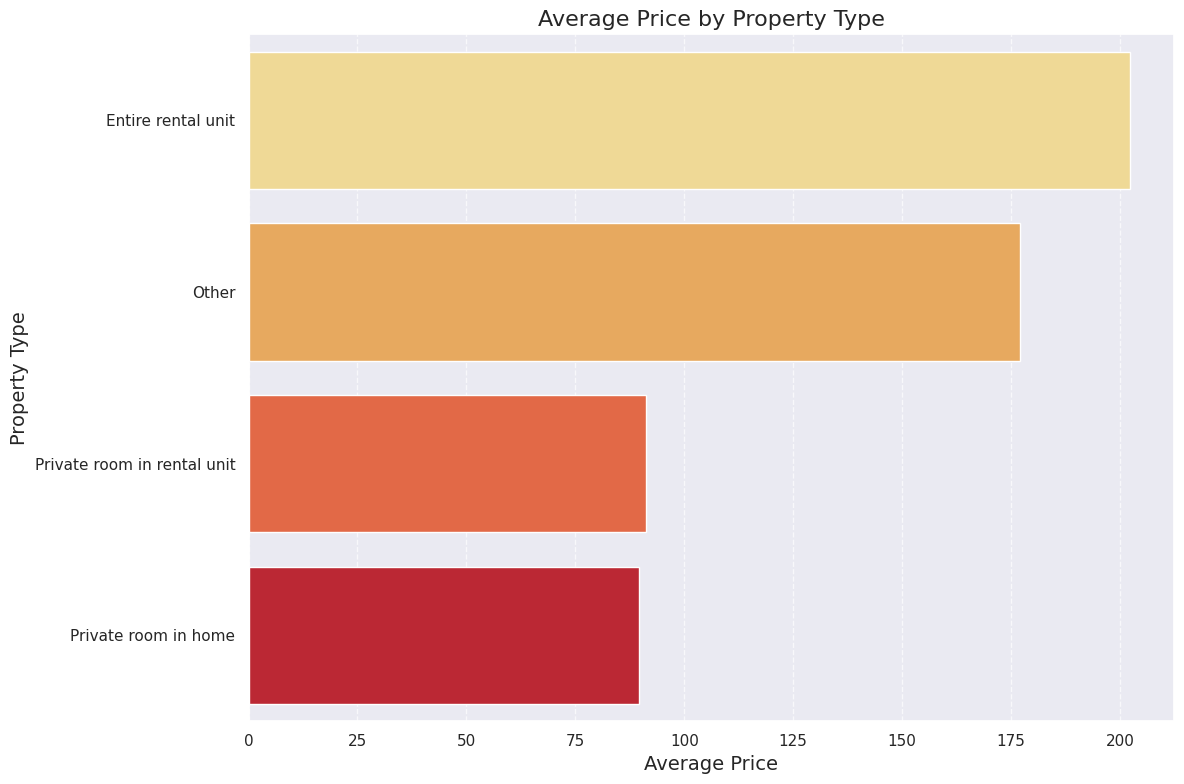

In [ ]:
# Group by property type and calculate mean price
mean_prices = selectedFeatures.groupby('property_type')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_prices.values, y=mean_prices.index, palette="YlOrRd")

# Customize plot
plt.title("Average Price by Property Type", fontsize=16)
plt.xlabel("Average Price", fontsize=14)
plt.ylabel("Property Type", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Analyzing the listings based on room types.

In [ ]:
# display number of room types
print("Number of room types :", len(selectedFeatures["room_type"].unique()))
print()

# display number of listings of each room type
print(selectedFeatures["room_type"].value_counts())

# Display number of listings of each room type
room_type_counts = selectedFeatures["room_type"].value_counts()

Number of room types : 4

room_type
Entire home/apt    11571
Private room        8956
Hotel room           221
Shared room           82
Name: count, dtype: int64


In [ ]:
fig = px.bar(x=room_type_counts.index,
             y=room_type_counts.values,
             color=room_type_counts.index,  # Color based on room type
             title="Number of Listings by Room Type",
             labels={'x': 'Room Type', 'y': 'Count'},
             height=600)
fig.show()

The bar graph displays the distribution of room types, showing that most of the listings are entire home/apt with private rooms being second,Hotel rooms being the thrid and Shared room being the least.

Let's look at the listings by room type in further details:

1. Entire Home/Apt: This category has the highest bar, indicating that most of the listings in our dataset fall under the "Entire Home/Apt" category. This suggests that a significant portion of the listings are for entire homes or apartments that guests can rent on their own, without sharing the space with the host or other guests.

2. Private Rooms: The second-highest bar represents the "Private Rooms" category. This indicates that the number of listings for private rooms is lower than entire homes/apartments but still quite substantial. Private rooms are accommodations where guests have their own separate room within a larger property and generally have more privacy compared to shared rooms.

3. Shared Rooms: The third-highest bar corresponds to the "Shared Rooms" category. Shared rooms typically involve guests sharing a room with other guests or the host, which might be less common or desirable compared to having a private space.

4. Hotel Rooms: The shortest bar corresponds to the "Hotel Rooms" category. This suggests that the least number of listings are for hotel rooms.

In [ ]:
# Checking out the mean prices for the different room and property types
roomProperty_DF = selectedFeatures.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
2,Other,Hotel room,262.619910
0,Entire rental unit,Entire home/apt,202.256776
1,Other,Entire home/apt,199.369916
3,Other,Private room,140.191611
4,Other,Shared room,99.902439


<ipython-input-26-388c8ac4b28f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




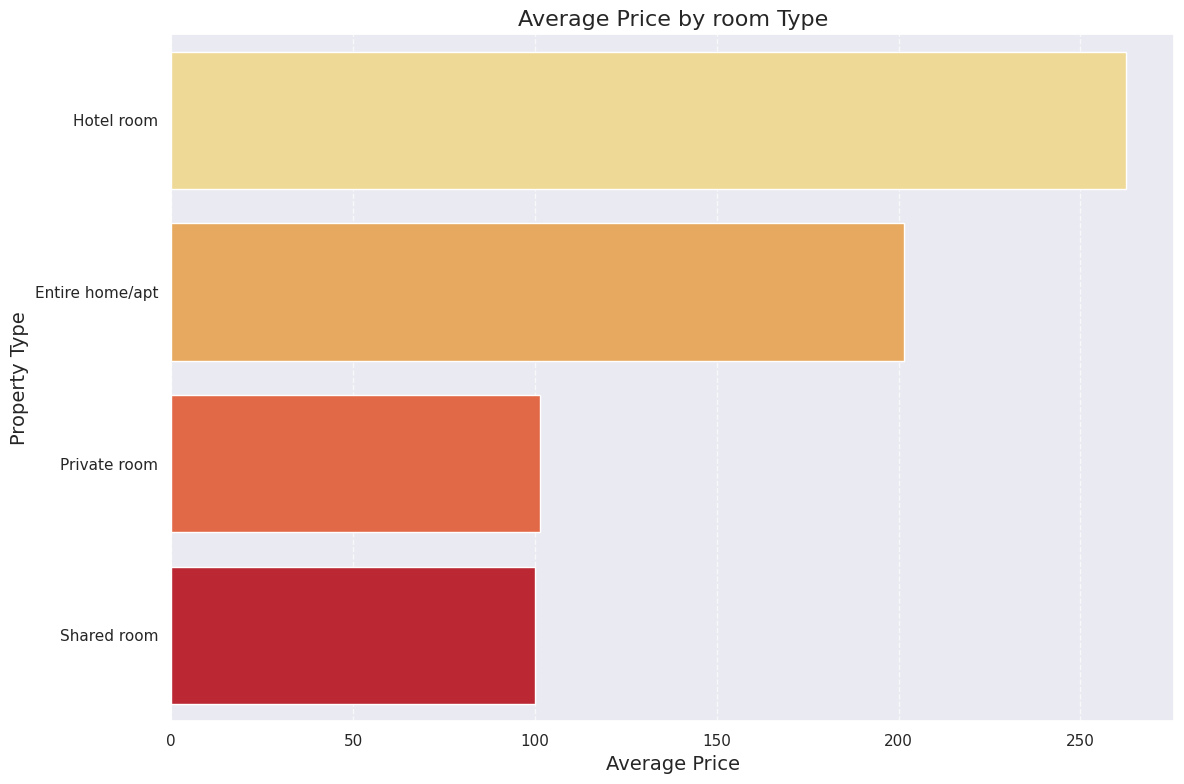

In [ ]:
# Group by property type and calculate mean price
mean_prices = selectedFeatures.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_prices.values, y=mean_prices.index, palette="YlOrRd")

# Customize plot
plt.title("Average Price by room Type", fontsize=16)
plt.xlabel("Average Price", fontsize=14)
plt.ylabel("Property Type", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Anaylzing the listings based on the number of bedrooms.

In [ ]:
# Number of bedrooms
unique_bedrooms = selectedFeatures["bedrooms"].unique()
print(f"Number of bedrooms: {len(unique_bedrooms)}")
print("Bedrooms | Listings")

# Number of listings of each room type
bedroom_counts = selectedFeatures["bedrooms"].value_counts()
for bedrooms, count in bedroom_counts.items():
    print(f"{bedrooms} | {count}")


Number of bedrooms: 8
Bedrooms | Listings
1.0 | 13686
2.0 | 3410
0.0 | 2106
3.0 | 1185
4.0 | 304
5.0 | 103
6.0 | 30
7.0 | 6


In [ ]:
# Creating a number of rooms vs property type dataframe
noRoomDF = selectedFeatures[['property_type', 'bedrooms']]
noRoomDF.head(n=15)

,property_type,bedrooms
0,Private room in rental unit,1.0
1,Other,1.0
3,Other,1.0
4,Private room in rental unit,1.0
5,Private room in rental unit,1.0
7,Entire rental unit,2.0
8,Other,1.0
9,Private room in rental unit,2.0
11,Other,1.0
12,Other,0.0


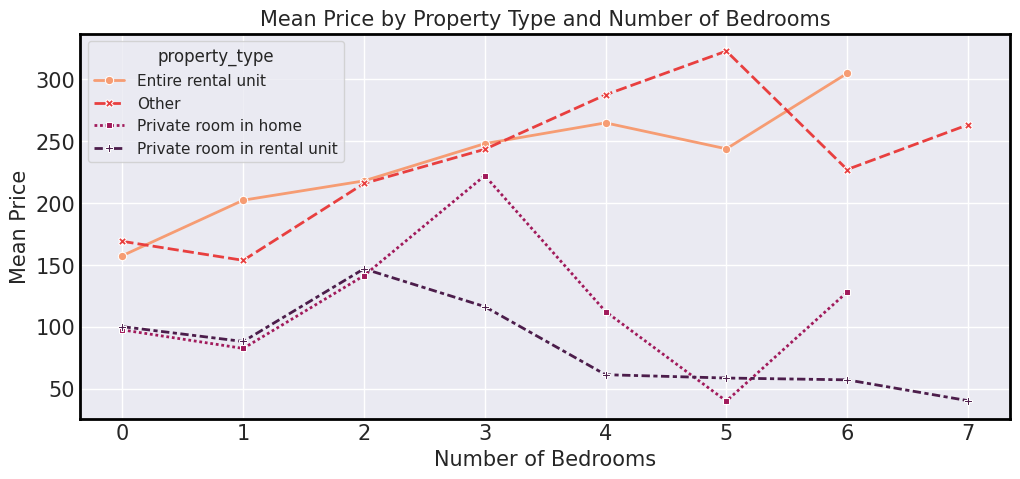

In [ ]:
# Calculate the mean price for each combination of property type and bedrooms
mean_prices = selectedFeatures.groupby(['property_type', 'bedrooms'])['price'].mean().unstack()

# Create a line plot using Seaborn with a larger figure size
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(
    data=mean_prices.T,  # Transpose the data for line plot
    markers=True,        # Show markers on the lines
    palette="rocket_r",  # You can choose a different color palette if desired
    linewidth=2,         # Set line width
)

# Customize the plot
plt.xlabel("Number of Bedrooms", fontsize=15)
plt.ylabel("Mean Price", fontsize=15)
plt.title("Mean Price by Property Type and Number of Bedrooms", fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which='both', direction='in')

# Show the plot
plt.show()



The line plot image shows the mean price of properties by property type and number of bedrooms. The mean price increases with the number of bedrooms for all property types. However, the rate of increase varies depending on the property type where entire unit with higher no.of bedroom has the maximum price.

# Analyzing if any particular ammenity results in higher prices.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS


In [ ]:
import re
from nltk.corpus import stopwords

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings
amenitiesDF = selectedFeatures[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

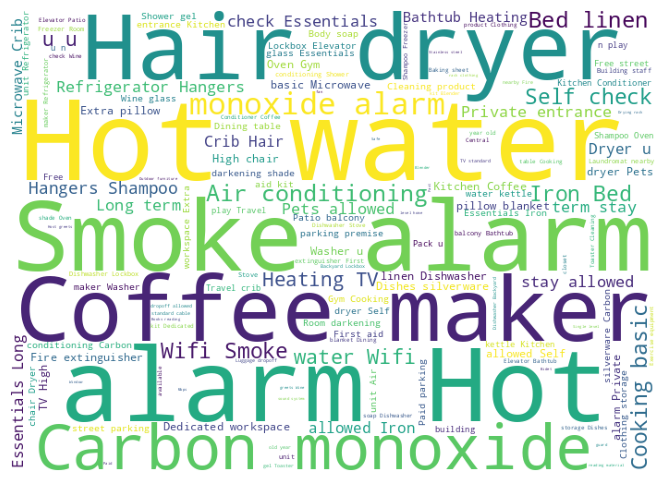

In [ ]:
wordcloud = WordCloud(width = 700, height = 500, background_color="white").generate(allemenities_words)
plt.figure(figsize=(9,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b> From the above wordcloud, we can see that the listings with highest prices have ammenities such as 'Hot Water', 'Coffee maker', 'Smoke alarm', 'bed linen', 'monoxide alarm' ,'hair dryer' , 'Self check in', etc. These ammenities will be further explored in depth in the machine learning part of this project.

## Analyzing the listings based on the neighbourhood group.

In [ ]:
result = selectedFeatures.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()
result = result.rename(columns={'price': 'avg_price'})
print(result)


  neighbourhood_group_cleansed   avg_price
0                        Bronx  105.529867
1                     Brooklyn  142.820203
2                    Manhattan  193.891040
3                       Queens  117.263096
4                Staten Island  112.683871


In [ ]:
temp_count = selectedFeatures.groupby('neighbourhood_group_cleansed').size().reset_index(name='count')
temp_count = temp_count.sort_values(by='count', ascending=False)
temp_count


,neighbourhood_group_cleansed,count
2,Manhattan,9040
1,Brooklyn,7197
3,Queens,3379
0,Bronx,904
4,Staten Island,310


In [ ]:
fig = px.bar(temp_count,
             x='neighbourhood_group_cleansed',
             y='count',
             color='neighbourhood_group_cleansed',  # Set color based on the neighbourhood
             title="Number of Airbnb Rentals in different Neighbourhood in NYC",
             labels={'neighbourhood_group_cleansed': 'Neighbourhood', 'count': 'Number of Rentals'},
             height=600)
fig.show()

There appear to be nearly 9,000 rental listings available in Manhattan, likely owing to its status as one of the most popular tourist destinations. Conversely, Staten Island appears to have the fewest rental listings among the boroughs.

## Analysing number of listings for each neighbourhood and median price

In [ ]:
temp_price = selectedFeatures.groupby('neighbourhood_group_cleansed')['price'].median().reset_index()

In [ ]:
temp_count = temp_count.rename(columns = {'index': 'neighbourhood_group_cleansed', 'neighbourhood_group_cleansed': 'count'})

In [ ]:
# Group by 'neighbourhood_group_cleansed' and count the number of listings
temp_count = selectedFeatures.groupby('neighbourhood_group_cleansed').size().reset_index(name='listing_count')

# Group by 'neighbourhood_group_cleansed' and calculate the median price
temp_price = selectedFeatures.groupby('neighbourhood_group_cleansed')['price'].median().reset_index(name='median_price')


In [ ]:
temp_merged = temp_price.merge(temp_count, on='neighbourhood_group_cleansed')

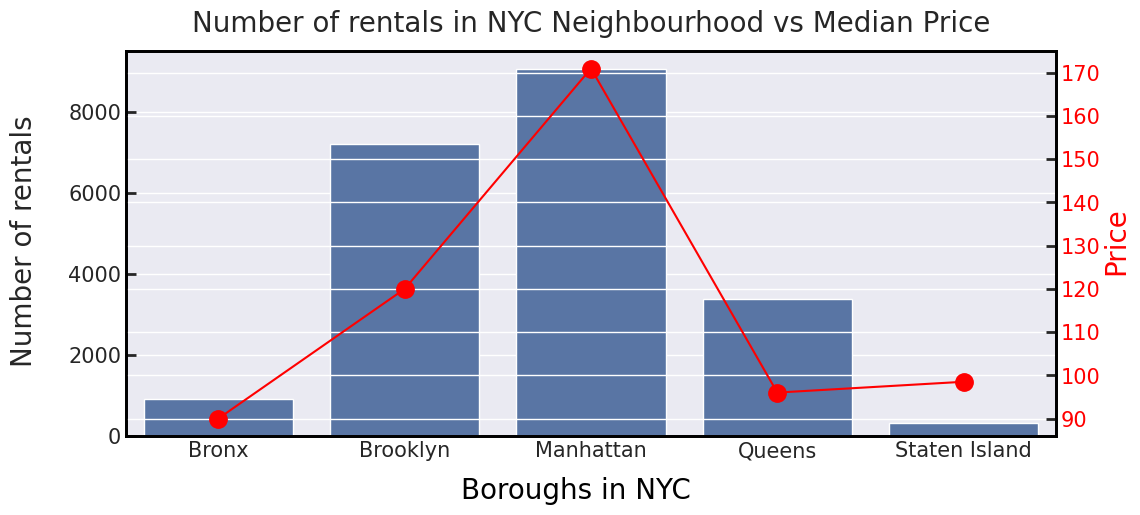

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = temp_merged['neighbourhood_group_cleansed'], y = temp_merged['listing_count'], ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")

ax1 = ax.twinx()
ax1.plot(temp_merged['neighbourhood_group_cleansed'], temp_merged['median_price'], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Number of rentals in NYC Neighbourhood vs Median Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2)
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.95, 0.5, 'Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Number of rentals', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Boroughs in NYC', ha='center', va='center', rotation = 'horizontal', color = 'black', fontsize = 20)

plt.savefig('NumberofRentalsinNeighbourhood_vs_medianPrice.jpg',  bbox_inches='tight', dpi = 500)

<b>Rentals in Manhattan and Brooklyn are more expensive compared to other boroughs in New York City. Tourists with tight budgets should be aware of the higher rental costs if they plan to visit these two boroughs. The data shows a clear pattern of higher rental prices in Manhattan and Brooklyn versus the other boroughs.

<b>By analyzing the number of listings and prices for each neighborhood, we can get a clearer understanding of which neighbourhoods have a lot of expensive listings. Looking at the analysis done so far, we can see that certain neighbourhoods are indeed more 'expensive' than others. However, some of those neighbourhoods do not have as many listings as other expensive neighbourhoods. Since our problem was to identify factors that make a listing more expensive, we can infer that these neighbourhoods tend to have more expensive listings. However, a more thorough inference would be to identify neighbourhoods that have both a higher number of listings and higher price as lower number of listings would mean fewer available listing for a customer to choose.

## Analyzing if number of reviews a listing affects its price.

<Axes: >

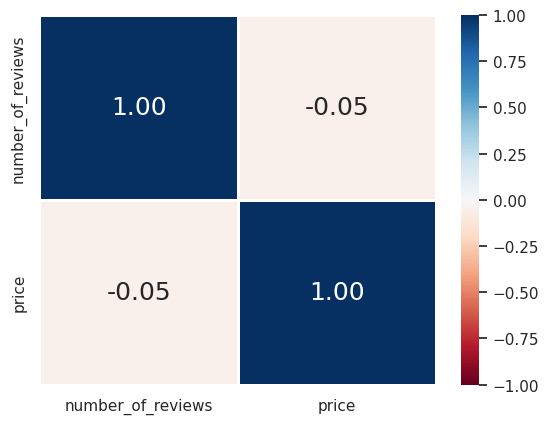

In [ ]:
price_review = selectedFeatures[selectedFeatures['price'] <= 4000][['number_of_reviews', 'price']].sort_values(by='price')
sns.heatmap(price_review.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

<b>From the above correlation matrix, we can clearly see that number of reviews and the price of a listing has a weak negative correlation. Hence we can conclude that the number of reviews a listing receives does not have much of an impact on the price.

## Analyzing if host response time affects the price of listing

In [ ]:
# Convert 'price' column to numeric in case it contains non-numeric values
selectedFeatures['price'] = pd.to_numeric(selectedFeatures['price'], errors='coerce')

# Group by 'host_response_time' and calculate mean, median, and count
price_vs_response_time = selectedFeatures.groupby('host_response_time').agg(
    Mean=('price', 'mean'),
    Median=('price', 'median'),
    Count=('host_response_time', 'count')
).reset_index()

# Ensure 'host_response_time' column is of type str
price_vs_response_time['host_response_time'] = price_vs_response_time['host_response_time'].astype(str)

# Convert 'host_response_time' to categorical for proper sorting
price_vs_response_time['host_response_time'] = pd.Categorical(price_vs_response_time['host_response_time'], categories=sorted(price_vs_response_time['host_response_time'].unique()))

# Sort by the categorical variable
price_vs_response_time = price_vs_response_time.sort_values('host_response_time').reset_index(drop=True)

# Rename columns
price_vs_response_time = price_vs_response_time.rename(columns={
    'Mean': 'Mean',
    'Median': 'Median',
    'Count': 'Count'
})

# Display the result
print(price_vs_response_time)

   host_response_time        Mean  Median  Count
0                   0  157.139717   135.0   4094
1  a few days or more  141.289072   120.0    851
2        within a day  135.911277   112.0   1871
3  within a few hours  143.177690   122.0   3281
4      within an hour  169.532470   140.0  10733


<ipython-input-45-6df084cbdb4e>:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



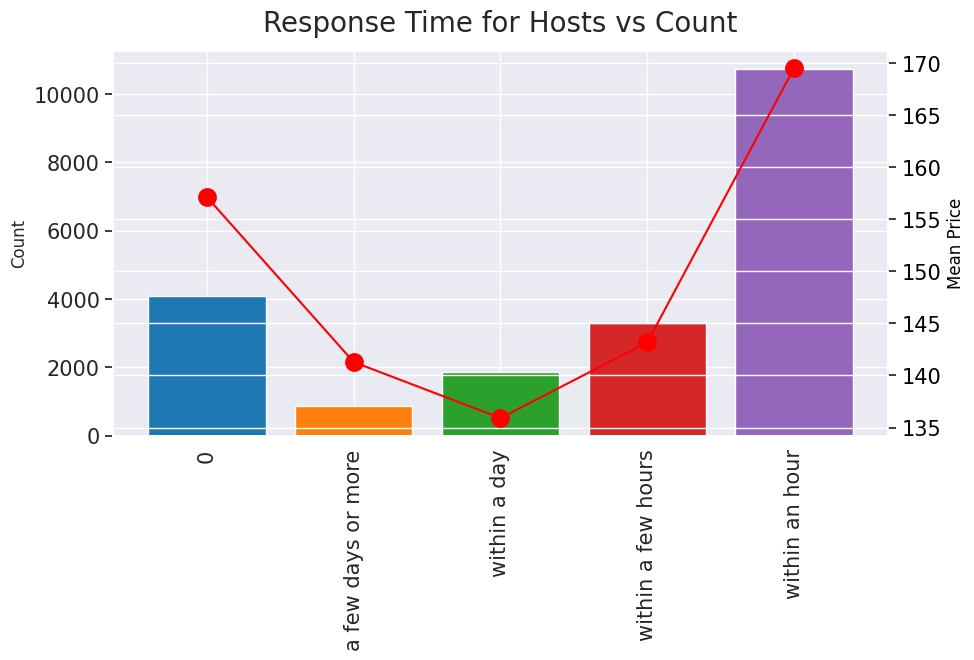

In [ ]:
bright_palette = sns.color_palette("tab10")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create a bar plot for 'Count' with the bright color palette
ax.bar(price_vs_response_time['host_response_time'], price_vs_response_time['Count'], color=bright_palette)

# Set labels and title
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.set_xticklabels(price_vs_response_time['host_response_time'], rotation=90)
plt.text(0.5, 1.05, 'Response Time for Hosts vs Count',
        horizontalalignment='center',
        fontsize=20,
        transform=ax.transAxes)

# Create a second y-axis for 'Mean'
ax1 = ax.twinx()
ax1.plot(price_vs_response_time['host_response_time'], price_vs_response_time['Mean'], color='red', marker='o', markersize=12.5)

# Set labels for the second y-axis
ax1.set_ylabel("Mean Price", color='black')

# Adjust tick parameters and spines
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor='black')

# Show the plot
plt.show()

from the barchart above we can clearly notice that those listing which have a lower response time has the higher price with the median price of about $200  

# Data Preprocessing for Modelling

Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:
- Room Type
- Property Type
- Number of Bedrooms
- Amenities
- Number of Reviews
- accommodates
- host response time


In [ ]:
newListingsDF = selectedFeatures[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price','accommodates','host_response_time','bathrooms_text','instant_bookable']]
newListingsDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20830 entries, 0 to 37433
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   room_type           20830 non-null  object 
 1   property_type       20830 non-null  object 
 2   bedrooms            20830 non-null  float64
 3   amenities           20830 non-null  object 
 4   number_of_reviews   20830 non-null  int64  
 5   price               20830 non-null  float64
 6   accommodates        20830 non-null  int64  
 7   host_response_time  20830 non-null  object 
 8   bathrooms_text      20830 non-null  object 
 9   bathrooms_text      20830 non-null  object 
 10  instant_bookable    20830 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.9+ MB


In [ ]:
# Keep only the first occurrence of each column name
newListingsDF = newListingsDF.loc[:, ~newListingsDF.columns.duplicated()]

Feature Engineering

In [ ]:
# List of amenities
amenity_list = [
    'Long term stays allowed', 'Heating', 'Dedicated workspace',
    'Bed linens', 'Extra pillows and blankets', 'Ethernet connection', 'Elevator',
    'Air conditioning', 'TV', 'Smoke alarm', 'Hot water', 'Luggage dropoff allowed',
    'Iron', 'Oven', 'Refrigerator', 'Wifi', 'Carbon monoxide alarm', 'Coffee maker',
    'Dishes and silverware', 'Hair dryer', 'Baking sheet', 'Stove',
    'Bathtub', 'Cooking basics', 'Cleaning available during stay', 'Kitchen',
    'Fire extinguisher', 'Self check-in', 'Paid parking off premises', 'Hangers'
]

# Create columns for each amenity and initialize them to 0
for amenity in amenity_list:
    column_name = amenity.lower().replace(' ', '_')
    newListingsDF[column_name] = 0

# Iterate through the DataFrame and set the corresponding columns to 1 if the amenity is present
for amenity in amenity_list:
    column_name = amenity.lower().replace(' ', '_')
    newListingsDF.loc[newListingsDF['amenities'].str.contains(amenity), column_name] = 1

# Display the modified data frame with new columns
newListingsDF.head()

,room_type,property_type,bedrooms,amenities,number_of_reviews,price,accommodates,host_response_time,bathrooms_text,instant_bookable,...,baking_sheet,stove,bathtub,cooking_basics,cleaning_available_during_stay,kitchen,fire_extinguisher,self_check-in,paid_parking_off_premises,hangers
0,Private room,Private room in rental unit,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",9,200.0,1,0,1 shared bath,f,...,0,0,0,0,0,1,0,0,0,0
1,Private room,Other,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",102,82.0,2,0,1 private bath,f,...,0,0,1,0,0,1,0,0,0,1
3,Entire home/apt,Other,1.0,"[""Fire extinguisher"", ""Clothing storage: close...",241,139.0,2,within an hour,1 bath,f,...,1,0,0,1,1,1,1,0,0,1
4,Private room,Private room in rental unit,1.0,"[""Oven"", ""Rice maker"", ""Laundromat nearby"", ""L...",274,130.0,2,within an hour,1 shared bath,f,...,1,1,0,1,0,1,0,1,0,1
5,Private room,Private room in rental unit,1.0,"[""Kitchen"", ""Air conditioning"", ""Dishes and si...",44,139.0,2,0,0,f,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Replace 'amenities' with a count of amenities
newListingsDF['amenities'] = newListingsDF['amenities'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Optional: Rename the column to reflect the change
newListingsDF.rename(columns={'amenities': 'amenities_count'}, inplace=True)

# Check the updated DataFrame
newListingsDF.info()
newListingsDF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20830 entries, 0 to 37433
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       20830 non-null  object 
 1   property_type                   20830 non-null  object 
 2   bedrooms                        20830 non-null  float64
 3   amenities_count                 20830 non-null  int64  
 4   number_of_reviews               20830 non-null  int64  
 5   price                           20830 non-null  float64
 6   accommodates                    20830 non-null  int64  
 7   host_response_time              20830 non-null  object 
 8   bathrooms_text                  20830 non-null  object 
 9   instant_bookable                20830 non-null  object 
 10  long_term_stays_allowed         20830 non-null  int64  
 11  heating                         20830 non-null  int64  
 12  dedicated_workspace             20830

,room_type,property_type,bedrooms,amenities_count,number_of_reviews,price,accommodates,host_response_time,bathrooms_text,instant_bookable,...,baking_sheet,stove,bathtub,cooking_basics,cleaning_available_during_stay,kitchen,fire_extinguisher,self_check-in,paid_parking_off_premises,hangers
0,Private room,Private room in rental unit,1.0,7,9,200.0,1,0,1 shared bath,f,...,0,0,0,0,0,1,0,0,0,0
1,Private room,Other,1.0,32,102,82.0,2,0,1 private bath,f,...,0,0,1,0,0,1,0,0,0,1
3,Entire home/apt,Other,1.0,47,241,139.0,2,within an hour,1 bath,f,...,1,0,0,1,1,1,1,0,0,1
4,Private room,Private room in rental unit,1.0,29,274,130.0,2,within an hour,1 shared bath,f,...,1,1,0,1,0,1,0,1,0,1
5,Private room,Private room in rental unit,1.0,14,44,139.0,2,0,0,f,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type', 'property_type'], dtype=int)

#renaming some categories to remove '&' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Hotel room': 'room_type_Hotel_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Entire rental unit': 'property_type_Entire_rental_unit'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Private room in rental unit': 'property_type_Private_room_in_rental_unit'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Private room in home ': 'property_type_Private_room_in_home'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Entire home': 'property_type_Entire_home'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Entire condo': 'property_type_Entire_condo'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Private room in townhouse': 'property_type_Private_room_in_townhouse'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20830 entries, 0 to 37433
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   bedrooms                                   20830 non-null  float64
 1   amenities_count                            20830 non-null  int64  
 2   number_of_reviews                          20830 non-null  int64  
 3   price                                      20830 non-null  float64
 4   accommodates                               20830 non-null  int64  
 5   host_response_time                         20830 non-null  object 
 6   bathrooms_text                             20830 non-null  object 
 7   instant_bookable                           20830 non-null  object 
 8   long_term_stays_allowed                    20830 non-null  int64  
 9   heating                                    20830 non-null  int64  
 10  dedicated_workspace        

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = newTransformedDF.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    newTransformedDF[col] = le.fit_transform(newTransformedDF[col].astype(str))  # Convert to string to avoid NaN issues

print("Label encoding applied to columns:", categorical_cols)


Label encoding applied to columns: ['host_response_time', 'bathrooms_text', 'instant_bookable']


# Regression Models
Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as prediction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.

* Predictor Variables: Room_type, Property_type, Bedrooms,Number_of_Reviews, Amenities_count and accommodates.
* Response Variable: Price

The following regression models will be carried out:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Random Forest Regression
* XGBoost
* CatBoost

# Data Preperation for model building
The following will be done to the data to ensure its fit into the different regression models:

* Encoding the categorical variables so that it can be fit into the regression models
* Separating the data into predictor and response variables
*Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [ ]:
newTransformedDF.head()

,bedrooms,amenities_count,number_of_reviews,price,accommodates,host_response_time,bathrooms_text,instant_bookable,long_term_stays_allowed,heating,...,paid_parking_off_premises,hangers,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,property_type_Entire_rental_unit,property_type_Other,property_type_Private room in home,property_type_Private_room_in_rental_unit
0,1.0,7,9,200.0,1,0,5,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,1.0,32,102,82.0,2,0,4,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,1.0,47,241,139.0,2,4,3,0,1,1,...,0,1,1,0,0,0,0,1,0,0
4,1.0,29,274,130.0,2,4,5,0,1,1,...,0,1,0,0,1,0,0,0,0,1
5,1.0,14,44,139.0,2,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


# Model Building using Pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
sparkDF = spark.createDataFrame(newTransformedDF) #Converting pandas dataframe to sparkdataframe

In [ ]:
sparkDF.show()

+--------+---------------+-----------------+-----+------------+------------------+--------------+----------------+-----------------------+-------+-------------------+----------+--------------------------+-------------------+--------+----------------+---+-----------+---------+-----------------------+----+----+------------+----+---------------------+------------+---------------------+----------+------------+-----+-------+--------------+------------------------------+-------+-----------------+-------------+-------------------------+-------+-------------------------+--------------------+----------------------+---------------------+--------------------------------+-------------------+----------------------------------+-----------------------------------------+
|bedrooms|amenities_count|number_of_reviews|price|accommodates|host_response_time|bathrooms_text|instant_bookable|long_term_stays_allowed|heating|dedicated_workspace|bed_linens|extra_pillows_and_blankets|ethernet_connection|elevator|a

In [ ]:
from pyspark.sql.functions import log1p

sparkDF = sparkDF.withColumn("log_price", log1p(sparkDF["price"]))

In [ ]:
feature_cols = [col for col in sparkDF.columns if col not in ['price', 'log_price']]
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
assembled_data = assembler.transform(sparkDF)

In [ ]:
final_data = assembled_data.select("features", "log_price").withColumnRenamed("log_price", "label")

In [ ]:
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

## Model 1: Linear Regression
Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables).

It then tries to find a linear relationship between the variables and predicts the price based on the linear line.

In [ ]:
from pyspark.sql.functions import expm1

# 1. Train Linear Regression on log(label)
lr = LinearRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)

# 2. Predict on test data
lr_predictions = lr_model.transform(test_data)

# 3. Evaluate on log scale (optional)
evaluator_log = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse_log = evaluator_log.evaluate(lr_predictions)
evaluator_log_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2_log = evaluator_log_r2.evaluate(lr_predictions)
print("Linear Regression RMSE (log scale):", round(rmse_log, 4))
print("Linear Regression R² (log scale):", round(r2_log, 4))



Linear Regression RMSE (log scale): 0.4449
Linear Regression R² (log scale): 0.5166


## Model 2: Ridge Regression


Ridge Regression is meant to be an upgrade to linear regression. It is similar to linear regression where it can be used to for regression and classification.

In [ ]:
evaluator_log_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_log_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")


# Ridge regression (regParam > 0, elasticNetParam = 0)
ridge = LinearRegression(featuresCol='features', labelCol='label', regParam=0.1, elasticNetParam=0.0)
ridge_model = ridge.fit(train_data)
ridge_preds = ridge_model.transform(test_data)

# Log scale evaluation
rmse_ridge_log = evaluator_log_rmse.evaluate(ridge_preds)
r2_ridge_log = evaluator_log_r2.evaluate(ridge_preds)


# Output
print(f"Ridge RMSE (log scale): {rmse_ridge_log:.4f}")
print(f"Ridge R² (log scale): {r2_ridge_log:.4f}")


Ridge RMSE (log scale): 0.4452
Ridge R² (log scale): 0.5158


## Model 3: Lasso Regression

Lasso Regression is similar to Ridge Regression, meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

In [ ]:
lasso = LinearRegression(featuresCol='features', labelCol='label', regParam=0.1, elasticNetParam=1.0)
lasso_model = lasso.fit(train_data)
lasso_preds = lasso_model.transform(test_data)

# Log scale evaluation
rmse_lasso_log = evaluator_log.evaluate(lasso_preds)
r2_lasso_log = evaluator_log_r2.evaluate(lasso_preds)


print(f"Lasso RMSE (log scale): {rmse_lasso_log:.4f}")
print(f"Lasso R² (log scale): {r2_lasso_log:.4f}")


Lasso RMSE (log scale): 0.5016
Lasso R² (log scale): 0.3854


## Model 5 : XGBoost

XGBoost is an open source library that provides a high-performance implementation of gradient boost decision trees (similar to the decision trees that we have learnt). It is a machine learning model that is able to perform prediction tasks regardless of Regression or Classification.

The key idea of Gradient Boosted Decision Trees is that they build a series of trees in which each tree is trained so that it attempts to correct the mistakes of the previous tree in the seroes.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 1. Split features and target
X = newTransformedDF.drop(columns=['price'])
y = newTransformedDF['price']

y_log = np.log1p(y)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 2. Initialize and train XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train_log)

# 3. Predict on log scale
y_pred_log = xgb_model.predict(X_test)

# 4. Evaluate on log scale
xgb_rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
xgb_r2_log = r2_score(y_test_log, y_pred_log)


# 7. Print results
print(f"XGBoost RMSE (log scale): {xgb_rmse_log:.4f}")
print(f"XGBoost R² (log scale): {xgb_r2_log:.4f}")



XGBoost RMSE (log scale): 0.3702
XGBoost R² (log scale): 0.6624


## Model 6: CatBoost

CatBoost is a high performance open source gradient boosting on decision trees. It can be used to solve both Classification and Regression problems.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

y_log = np.log1p(y)

# Train-test split on log target
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train CatBoost
cat_model = CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1, loss_function='RMSE', verbose=False)
cat_model.fit(X_train, y_train_log)

# Predict and back-transform
cat_preds_log = cat_model.predict(X_test)


# Evaluate on original scale
cat_rmse = np.sqrt(mean_squared_error(y_test_log, cat_preds_log))
cat_r2 = r2_score(y_test_log, cat_preds_log)

print(f"CatBoost RMSE (original scale): {cat_rmse:.4f}")
print(f"CatBoost R² (original scale): {cat_r2:.4f}")

CatBoost RMSE (original scale): 0.3734
CatBoost R² (original scale): 0.6564


# Comparision between all the models

In [ ]:
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost', 'CatBoost'],
    'RMSE':    [rmse_log, rmse_ridge_log, rmse_lasso_log, xgb_rmse_log, cat_rmse],
    'R²':    [r2_log, r2_ridge_log, r2_lasso_log, xgb_r2_log, cat_r2]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by RMSE (lower is better)
results_df = results_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

print(results_df)

               Model      RMSE        R²
0            XGBoost  0.370177  0.662368
1           CatBoost  0.373430  0.656410
2  Linear Regression  0.444870  0.516573
3   Ridge Regression  0.445233  0.515783
4   Lasso Regression  0.501591  0.385441


## The Most Important Features of a Property Listing

In [ ]:
feature_names = feature_cols

importances= cat_model.feature_importances_

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

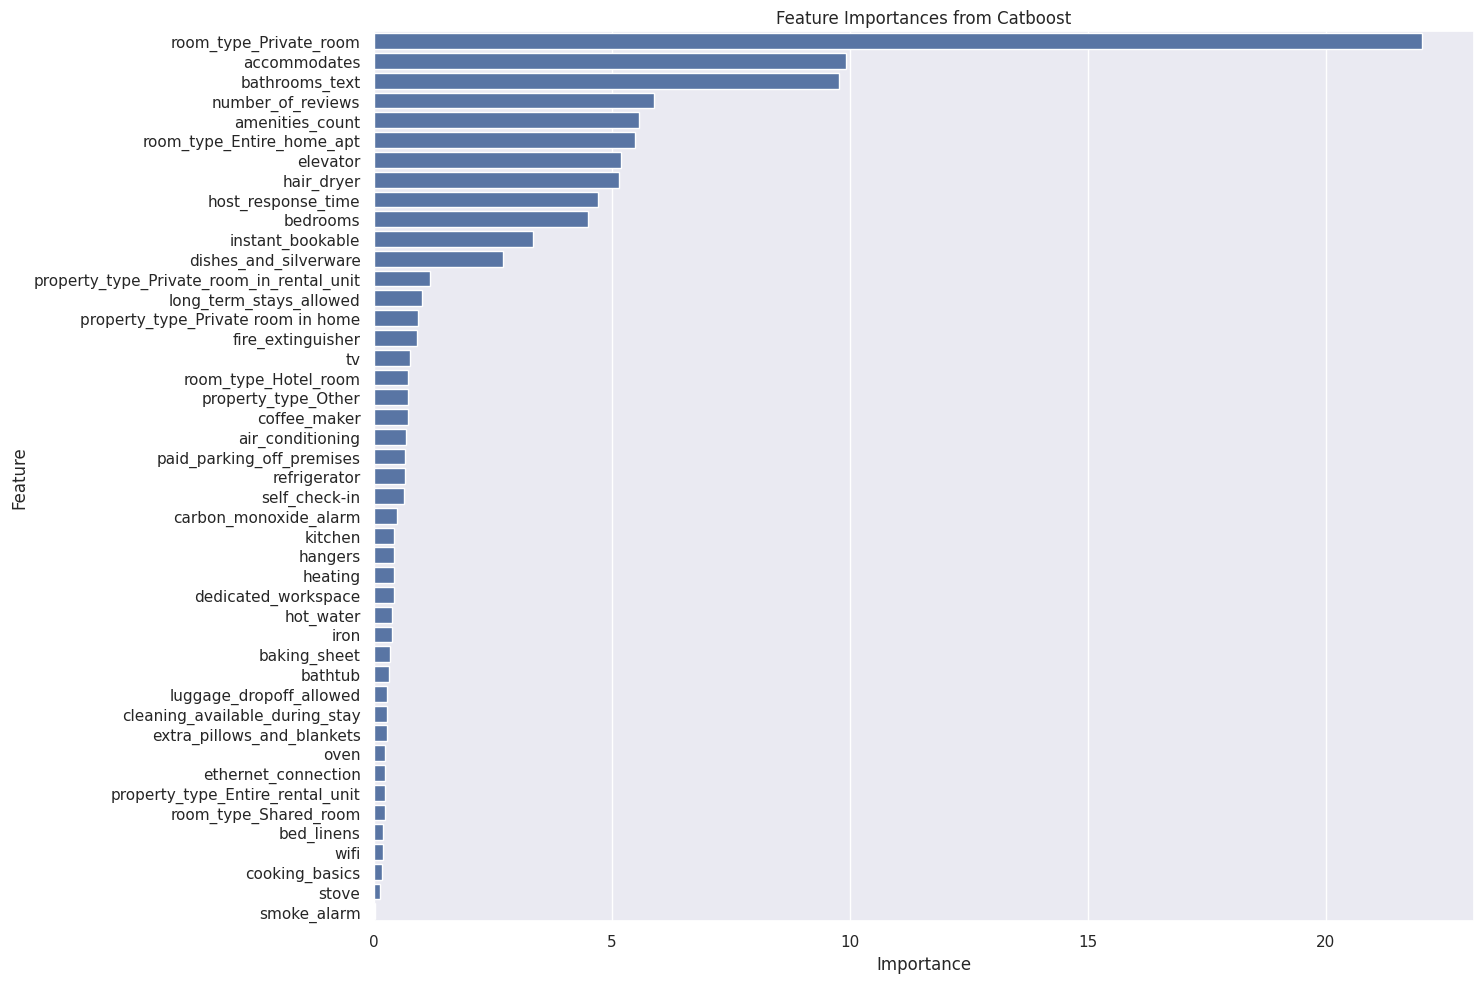

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances from Catboost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Evaluating the model given by the Catboost Regresssion

       Actual (log)  Predicted (log)
2429       4.983607         4.964067
31475      4.976734         5.029750
31297      3.931826         3.941058
34249      4.382027         4.603890
31078      4.691348         4.755086
32053      5.093750         4.646890
17055      5.564520         5.428214
29601      5.081404         5.043206
23114      5.796058         5.374609
17613      5.056246         5.343112


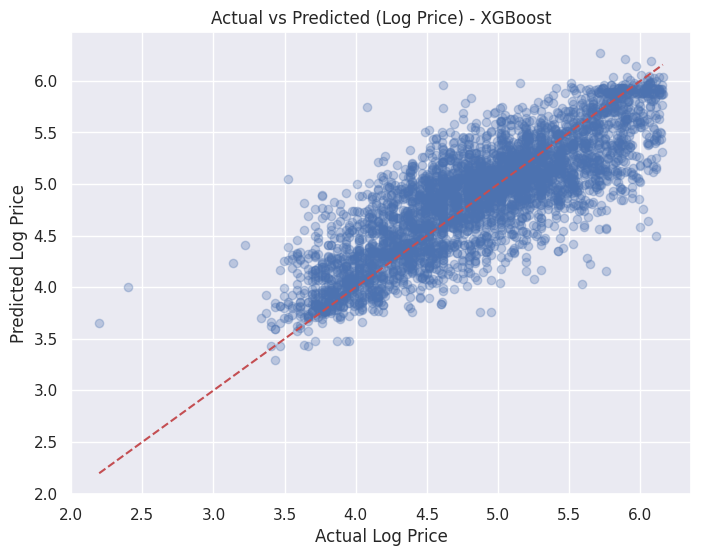

In [ ]:
comparison_df = pd.DataFrame({
    'Actual (log)': y_test_log,
    'Predicted (log)': y_pred_log,


})

print(comparison_df.head(10))  # View first 10 comparisons

# 6. Optional: Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test_log, y_pred_log, alpha=0.3)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'r--')  # ideal line
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted (Log Price) - XGBoost")
plt.grid(True)
plt.show()

As we can see from the scatter-plot and the table above we can clearly say that our model has predicted correctly for almost all the listing. We have used the log_price comparision as it provides us with the more accurate result for the right skewed model.

# Conclusion

From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring Airbnb host, if investing on a new property in New York, should focus on the following factors to maximize the price of his listing. Additionally, a traveler who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing:
-	Entire properties listed instead of just a single room fetch the highest prices.
-	Renting a place in Manhattan and Brooklyn is pricier than in other parts of New York City, so budget travelers should keep this in mind when visiting these areas.
-Apartment and landed house tend to be the most expensive and the most abundant properties in Airbnb.
-The more bedrooms a property has, the higher its price.
-Amenities such as: 'Hair dryer', 'Elevator', 'Coffee maker', 'Dish and silverware', 'monoxide alarm', 'fire extinguisher' etc. are all common among the more expensive listings.
-The number of reviews a listing receives does not have much of an impact on the price.
-Host Response time significantly affects the price of listing. The faster the response time, the more likely the price is higher. The guests who are on a budget should choose a listing where the host responds within a few days or more.